**Master Simulation**

Simulation of node states with pre processed distributions for group selection and uptime failures

In [104]:
import random
import simpy
import datetime
import numpy as np
import pandas as pd
import simulation_components as sc
import matplotlib.pyplot as plt


**Initialize Variables**

In [96]:
group_size = 100 # Group size
runs = 1000 # number of runs/cycles
total_tickets = 50000 # total virtual stakers
nodes = 100 # number of nodes
tickets = [] # initializing the array that will contain the tickets
group_members = [] # initializing the array that will contain indexes(node #) of tickets for each group
sim_cycles = 5 # maximum node cycles

**Simulation Inputs**

Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

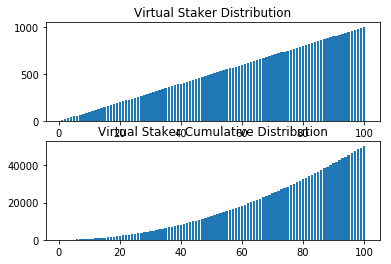

In [98]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
L02 = np.zeros(nodes) 

for i in range (0,nodes):
    L02[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, L02)
plt.title("Virtual Staker Distribution")

cdf_L02=sc.create_cdf(nodes,L02)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

**Pre-processed tickets and groups**

In [100]:
tickets = sc.preprocess_tickets(runs, total_tickets) # generates a size(total tickets x runs) matrix of tickets by sampling the uniform distribution
group_members = sc.preprocess_groups(tickets, runs, group_size) # generates a size (nodes x runs) matrix of group members


In [118]:
def group_distr(runs, nodes, group_members, cdf):
# function to calculate group ownership distribution
# need to add to sim components
    total_group_distr = np.zeros(nodes)
    max_owned = np.zeros(runs)
    group_distr_matrix = np.zeros((runs,nodes))
    for i in range(runs):
        group_distr = np.zeros(nodes)
        group_distr[1] = sum(group_members[i]<cdf[0])
        for j in range(1,nodes):
            group_distr[j] = sum(group_members[i]<cdf[j])-sum(group_members[i]<cdf[j-1])
        max_owned[i] = max(group_distr)/sum(group_distr)
        total_group_distr +=group_distr
        group_distr_matrix[i] = group_distr #saves the group ticket distribution for each run
    return total_group_distr, max_owned, group_distr_matrix

total_group_distr, max_owned, group_distr_matrix = group_distr(runs, nodes, group_members, cdf_L02)

**Pre-processed node failure modes**

In [116]:
failed_nodes = sc.node_failure_modes(nodes, runs)

In [123]:
print(failed_nodes[1:3])

[[False False False ...  True False False]
 [ True  True False ... False False False]]


**Create Nodes and Start Simulation Environment**

In [117]:
v = simpy.Environment()
print("creating nodes")
node_array = [sc.Node(env, 'Node %d' % i, datetime.datetime.now(), 10)
            for i in range(nodes)] #number of nodes
env.run()

df = []
for n in node_array:
    df.append([n.id, n.number_of_entries_generated
               , n.number_of_groups_joined
               , n.relay_request_time
               , n.relay_entry_watch_time])
    
df = pd.DataFrame(df)
df.columns=["id", "number_of_entries_generated", "number_of_groups_joined", "relay_request_time", "relay_entry_watch_time"]
df

creating nodes
Node 0 group formation failurecycle=0
Node 1 group formation failurecycle=0
Node 2 group formation failurecycle=0
Node 2 group formation failurecycle=0
Node 3 group formation failurecycle=0
Node 10 group formation failurecycle=0
Node 10 group formation failurecycle=0
Node 12 group formation failurecycle=0
Node 12 group formation failurecycle=0
Node 12 group formation failurecycle=0
Node 13 group formation failurecycle=0
Node 14 group formation failurecycle=0
Node 15 group formation failurecycle=0
Node 16 group formation failurecycle=0
Node 21 group formation failurecycle=0
Node 21 group formation failurecycle=0
Node 21 group formation failurecycle=0
Node 21 group formation failurecycle=0
Node 22 group formation failurecycle=0
Node 22 group formation failurecycle=0
Node 22 group formation failurecycle=0
Node 26 group formation failurecycle=0
Node 26 group formation failurecycle=0
Node 27 group formation failurecycle=0
Node 27 group formation failurecycle=0
Node 28 group f

,id,number_of_entries_generated,number_of_groups_joined,relay_request_time,relay_entry_watch_time
0,Node 0,11,11,1.583466,3.589991
1,Node 1,11,11,2.490152,1.637130
2,Node 2,11,11,3.317173,2.706448
3,Node 3,11,11,3.312625,2.283178
4,Node 4,11,11,3.645940,3.369035
5,Node 5,11,11,2.229661,4.760513
6,Node 6,11,11,3.453905,2.773217
7,Node 7,11,11,4.054395,3.294370
8,Node 8,11,11,3.010730,3.174733
9,Node 9,11,11,1.443939,1.515191


**Simulation Results**

[[0. 0.]
 [0. 0.]]
